In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("instadataset.csv")

C:\Users\PRADEEP\AppData\Local\Temp\ipykernel_17704\2995640844.py:1: DtypeWarning: Columns (0,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("instadataset.csv")


In [3]:
df.head(10)

,Name,Rank,Category,Followers in millions,Audience Country,Authentic Engagement in M,Engagement Avg. in M
0,cristiano,1.0,Sports with a ball,462900000,India,5.5,6.6
1,leomessi,2.0,Sports with a ballFamily,347200000,Argentina,3.6,4.8
2,kendalljenner,3.0,ModelingFashion,247600000,United States,3.0,4.9
3,arianagrande,4.0,Music,321400000,United States,2.4,3.4
4,zendaya,5.0,Cinema & Actors/actressesFashion,147000000,United States,4.3,5.8
5,kimkardashian,6.0,FashionBeauty,323600000,United States,1.7,2.5
6,taylorswift,7.0,Music,218200000,Brazil,2.4,3.2
7,kyliejenner,8.0,FashionModelingBeauty,357000000,United States,1.2,1.9
8,selenagomez,9.0,MusicLifestyle,334900000,United States,1.4,1.9
9,thv,10.0,NaN,46300000,United States,13.3,13.3


In [4]:
df.rename(columns={"Followers in millions":"Followers"},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Name                       1000 non-null     object 
 1   Rank                       1000 non-null     float64
 2   Category                   916 non-null      object 
 3   Followers                  1048575 non-null  int64  
 4   Audience Country           986 non-null      object 
 5   Authentic Engagement in M  1000 non-null     float64
 6   Engagement Avg. in M       1000 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 56.0+ MB


In [6]:
df.isna().sum()

Name                         1047575
Rank                         1047575
Category                     1047659
Followers                          0
Audience Country             1047589
Authentic Engagement in M    1047575
Engagement Avg. in M         1047575
dtype: int64

In [7]:
df.shape

(1048575, 7)

In [9]:
#let's remove null values
df = df.dropna(subset=["Name"])

In [11]:
df.shape

(1000, 7)

In [12]:
df.isna().sum()

Name                          0
Rank                          0
Category                     84
Followers                     0
Audience Country             14
Authentic Engagement in M     0
Engagement Avg. in M          0
dtype: int64

In [13]:
df.describe()

,Rank,Followers,Authentic Engagement in M,Engagement Avg. in M
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.604460e+07,302.163500,335.498900
std,288.819436,4.409884e+07,244.203526,269.317813
min,1.000000,1.600000e+06,0.000000,1.000000
25%,250.750000,8.600000e+06,118.800000,128.125000
50%,500.500000,1.410000e+07,238.350000,283.050000
75%,750.250000,2.542500e+07,447.000000,529.200000
max,1000.000000,5.284000e+08,990.900000,998.200000


In [15]:
# Which country have most number of followers
df["Audience Country"].value_counts()[:10]

United States    277
India            159
Brazil           145
Indonesia        136
Mexico            40
Spain             34
Russia            26
Argentina         23
Iran              21
Turkey            20
Name: Audience Country, dtype: int64

<AxesSubplot:>

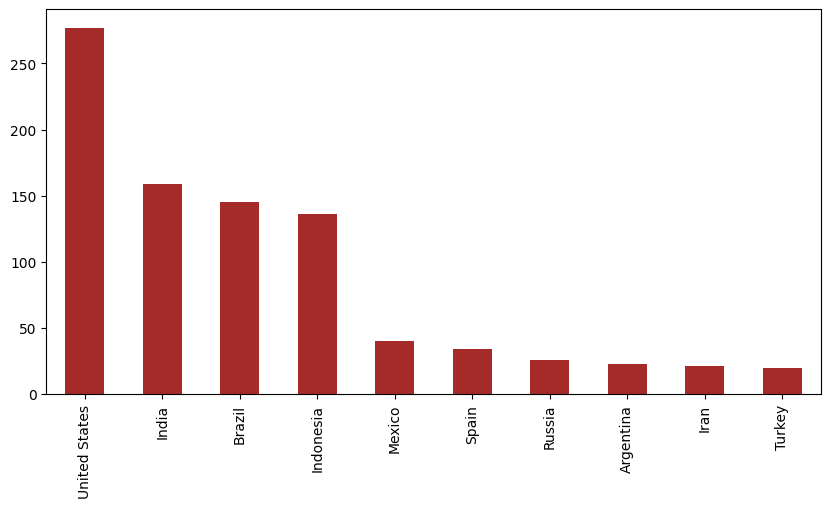

In [21]:
df["Audience Country"].value_counts()[:10].plot(kind="bar",figsize=(10,5),color='brown')

In [32]:
# who is having more followers from india
df[df["Audience Country"]=="India"].sort_values(by="Followers",ascending=False)[:10]

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement in M,Engagement Avg. in M
28,instagram,29.0,Photography,528400000,India,339.6,434.3
0,cristiano,1.0,Sports with a ball,462900000,India,5.5,6.6
40,therock,41.0,Cinema & Actors/actressesFitness & Gym,327300000,India,373.2,479.8
23,justinbieber,24.0,Music,245900000,India,798.5,1.2
12,virat.kohli,13.0,Sports with a ball,206900000,India,2.1,2.4
104,priyankachopra,105.0,Cinema & Actors/actresses,80200000,India,390.3,471.9
22,khaby00,23.0,Sports with a ball,78600000,India,2.8,3.9
100,nasa,101.0,SciencePhotography,78600000,India,412.2,496.7
99,nasa,100.0,SciencePhotography,78600000,India,412.2,496.7
128,shakira,129.0,Music,75600000,India,294.0,400.3


In [50]:
# shows Audience from Sports catagory
df[df["Category"].str.contains('Sports',na=False)]

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement in M,Engagement Avg. in M
0,cristiano,1.0,Sports with a ball,462900000,India,5.5,6.6
1,leomessi,2.0,Sports with a ballFamily,347200000,Argentina,3.6,4.8
12,virat.kohli,13.0,Sports with a ball,206900000,India,2.1,2.4
21,neymarjr,22.0,Sports with a ball,176200000,Brazil,1.3,1.8
22,khaby00,23.0,Sports with a ball,78600000,India,2.8,3.9
...,...,...,...,...,...,...,...
948,jharden13,949.0,Sports with a ball,11600000,United States,109.8,188.4
952,valeyellow46,953.0,Racing Sports,13900000,Indonesia,119.3,155.9
966,roberto_firmino,967.0,Sports with a ball,13600000,Brazil,104.7,156.1
969,warriors,970.0,LifestyleSports with a ball,24800000,United States,60.9,85.5


In [51]:
# shows Audience from Photography catagory
df[df["Category"].str.contains('Photography',na=False)]

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement in M,Engagement Avg. in M
28,instagram,29.0,Photography,528400000,India,339.6,434.3
99,nasa,100.0,SciencePhotography,78600000,India,412.2,496.7
100,nasa,101.0,SciencePhotography,78600000,India,412.2,496.7
141,natgeo,142.0,Nature & landscapesSciencePhotography,232200000,United States,91.4,117.8
258,xxxibgdrgn,259.0,PhotographyFashion,21200000,Indonesia,475.6,602.8
547,beautifuldestinations,548.0,PhotographyTravel,24700000,United States,142.1,190.6
622,pozevidalouca,623.0,LifestylePhotography,7000000,Brazil,228.5,574.0
772,la_beaute_africaine,773.0,Photography,1600000,Senegal,919.9,1.9
889,humansofny,890.0,LifestylePhotography,12100000,United States,167.2,197.8
893,nazormaya,894.0,LifestylePhotography,3500000,Mexico,459.2,679.7


In [52]:
# shows Audience from Actors catagory
df[df["Category"].str.contains('Actors',na=False)]

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement in M,Engagement Avg. in M
4,zendaya,5.0,Cinema & Actors/actressesFashion,147000000,United States,4.3,5.8
13,tomholland2013,14.0,Cinema & Actors/actresses,67600000,United States,5.7,7.0
25,uarmyhope,26.0,Art/ArtistsCinema & Actors/actressesMusic,37400000,South Korea,6.9,6.9
36,milliebobbybrown,37.0,Cinema & Actors/actresses,53200000,Brazil,2.8,3.5
38,jlo,39.0,MusicCinema & Actors/actresses,217500000,United States,585.7,743.2
...,...,...,...,...,...,...,...
976,nadine.nassib.njeim,977.0,Cinema & Actors/actressesModeling,15000000,Iraq,98.8,140.4
977,shahinsamadpoor,978.0,Literature & JournalismCinema & Actors/actresses,4500000,Iran,365.3,481.4
982,melissabenoist,983.0,FamilyCinema & Actors/actresses,4800000,United States,324.7,439.5
991,jaredleto,992.0,MusicCinema & Actors/actresses,10900000,United States,149.9,188.5


In [53]:
# pivot table to show statistics on category followers

df.pivot_table(index="Category", values="Followers", aggfunc=['mean', 'sum', 'min', 'max'], sort=False)

,mean,sum,min,max
,Followers,Followers,Followers,Followers
Category,,,,
Sports with a ball,3.563810e+07,3742000000,4000000,462900000
Sports with a ballFamily,1.959500e+08,391900000,44700000,347200000
ModelingFashion,7.462500e+07,298500000,12300000,247600000
Music,3.159401e+07,5276200000,3100000,321400000
Cinema & Actors/actressesFashion,8.140000e+07,162800000,15800000,147000000
...,...,...,...,...
BeautyHumor & Fun & HappinessCinema & Actors/actresses,3.500000e+06,3500000,3500000,3500000
Literature & JournalismCinema & Actors/actresses,4.500000e+06,4500000,4500000,4500000


In [55]:
df.pivot_table(index="Category", values="Engagement Avg. in M", aggfunc=['mean', 'sum', 'min', 'max'], sort=False)

,mean,sum,min,max
,Engagement Avg. in M,Engagement Avg. in M,Engagement Avg. in M,Engagement Avg. in M
Category,,,,
Sports with a ball,307.239048,32260.1,1.1,866.6
Sports with a ballFamily,233.450000,466.9,4.8,462.1
ModelingFashion,308.975000,1235.9,4.9,556.0
Music,368.432934,61528.3,1.0,959.7
Cinema & Actors/actressesFashion,70.150000,140.3,5.8,134.5
...,...,...,...,...
BeautyHumor & Fun & HappinessCinema & Actors/actresses,624.400000,624.4,624.4,624.4
Literature & JournalismCinema & Actors/actresses,481.400000,481.4,481.4,481.4


In [56]:
# showing the categories with the most followers
df.nlargest(10,'Followers').pivot_table(index="Category", values="Followers", aggfunc=['sum'], sort=False)

,sum
,Followers
Category,
Photography,528400000
Sports with a ball,462900000
FashionModelingBeauty,357000000
Sports with a ballFamily,347200000
MusicLifestyle,334900000
Cinema & Actors/actressesFitness & Gym,327300000
FashionBeauty,323600000
Music,321400000


In [57]:
# showing the categories with the most avg audience engagement

df.nlargest(20,'Engagement Avg. in M').pivot_table(index="Category", values="Engagement Avg. in M", sort=False)

,Engagement Avg. in M
Category,
Cinema & Actors/actressesShows,974.000000
Cinema & Actors/actresses,949.220000
Modeling,950.250000
Management & MarketingMusic,960.700000
Music,941.533333
ShowsHumor & Fun & Happiness,956.800000
Lifestyle,947.100000
LifestyleMusicSports with a ball,936.000000


In [58]:
# showing the categories with the most authentic audience engagement

df.nlargest(20,'Authentic Engagement in M').pivot_table(index="Category", values="Authentic Engagement in M", sort=False)

,Authentic Engagement in M
Category,
Shows,990.90
Cinema & Actors/actresses,962.10
MusicFashion,949.90
Lifestyle,926.85
ShowsCinema & Actors/actresses,933.10
Modeling,926.60
LifestyleCinema & Actors/actresses,923.90
Photography,919.90
Music,911.40


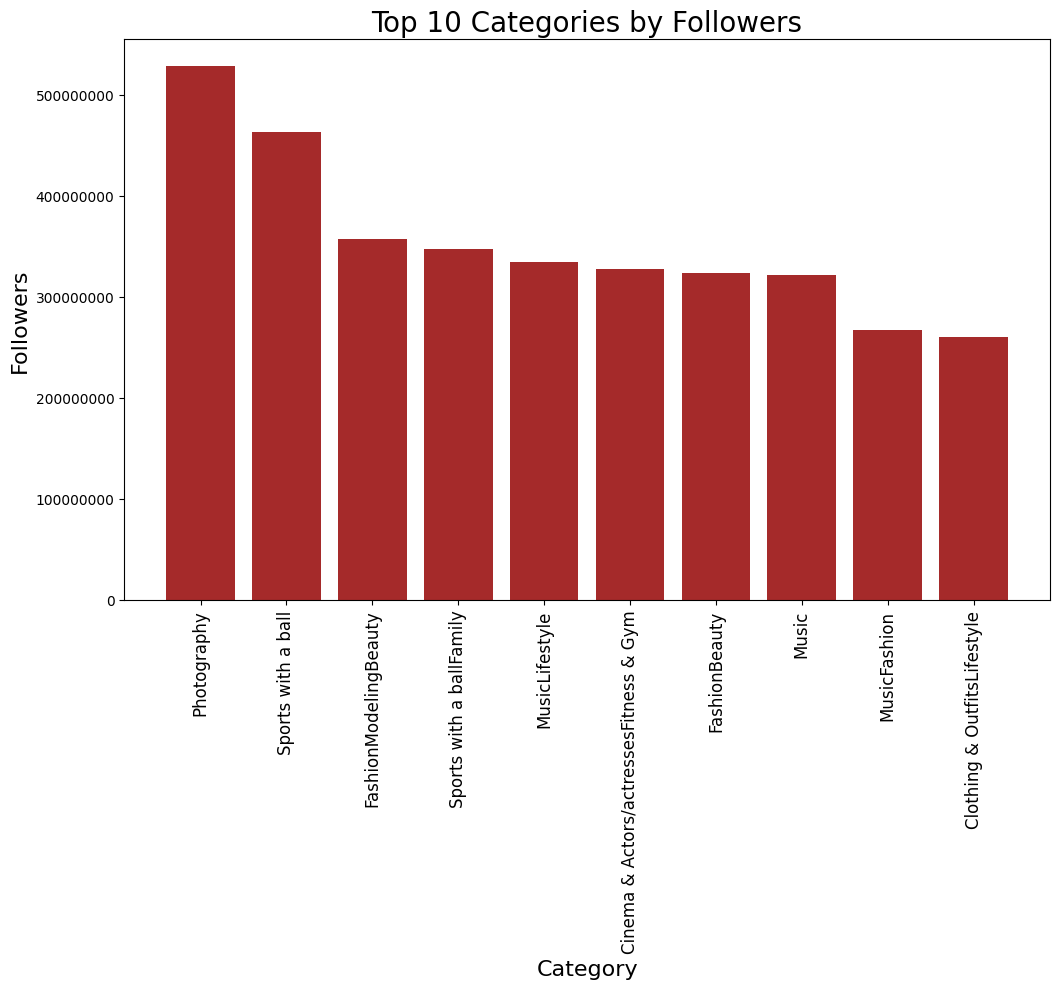

In [65]:
# plotting followers
topfollowers = df.nlargest(10,'Followers')
plt.figure(figsize=(10,10))
fig1 = plt.bar(topfollowers.Category, topfollowers.Followers, label='Followers', width=0.8, color='brown')
plt.xticks(fontsize = 12, rotation = 90)
plt.ylabel("Followers", fontsize = 16)
plt.xlabel("Category", fontsize = 16)
plt.title("Top 10 Categories by Followers", fontsize = 20)
plt.tight_layout()
# remove scientific notation
plt.ticklabel_format(axis="y", style='plain')

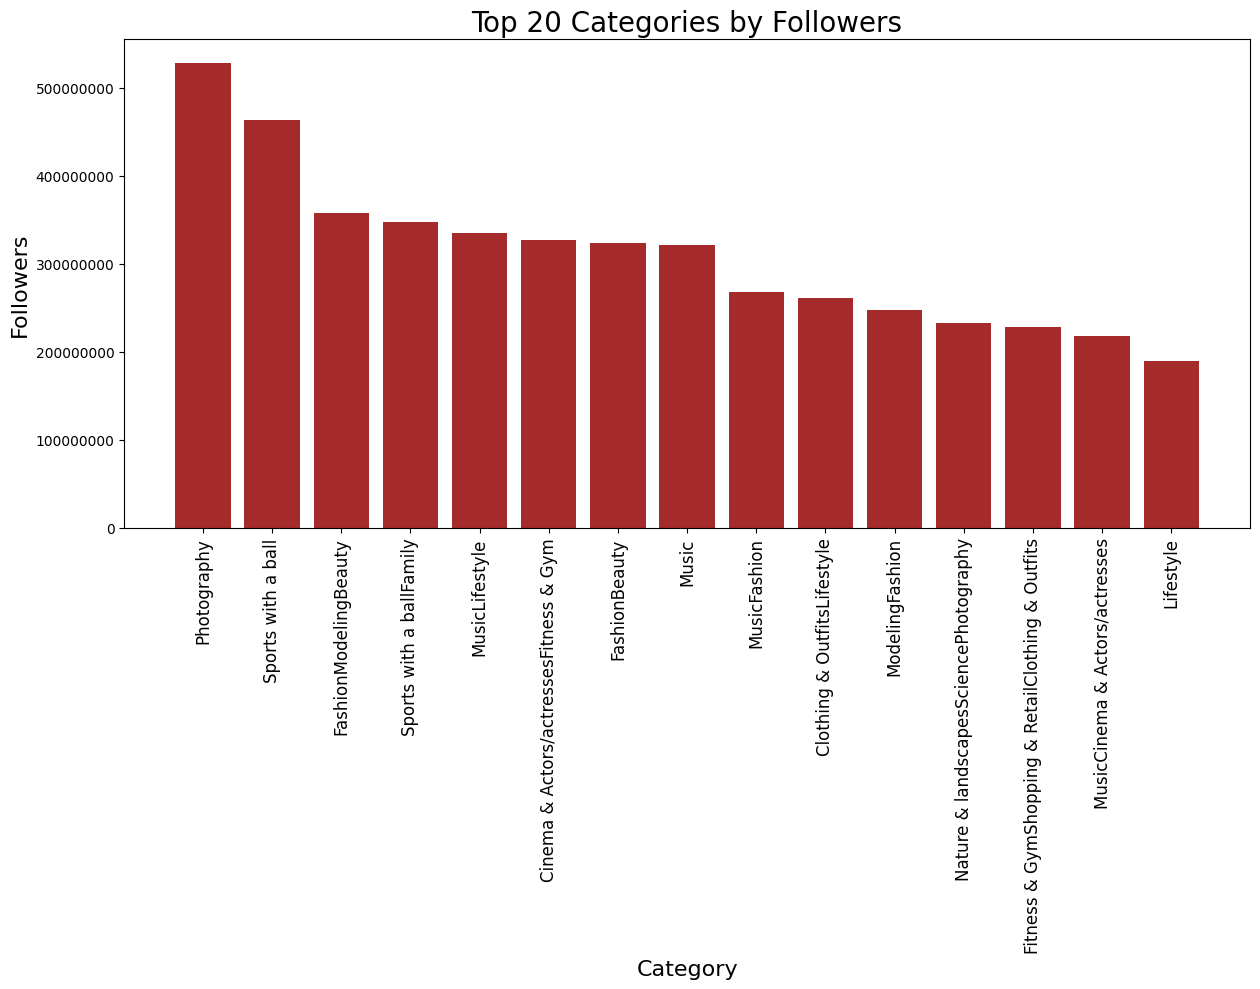

In [66]:
top20followers = df.nlargest(20,'Followers')

# plotting followers

plt.figure(figsize=(12,10))
fig2 = plt.bar(top20followers.Category, top20followers.Followers, label='Followers', width=0.8, color='brown')
plt.xticks(fontsize = 12, rotation = 90)
plt.ylabel("Followers", fontsize = 16)
plt.xlabel("Category", fontsize = 16)
plt.title("Top 20 Categories by Followers", fontsize = 20)
plt.tight_layout()
# remove scientific notation
plt.ticklabel_format(axis="y", style='plain')

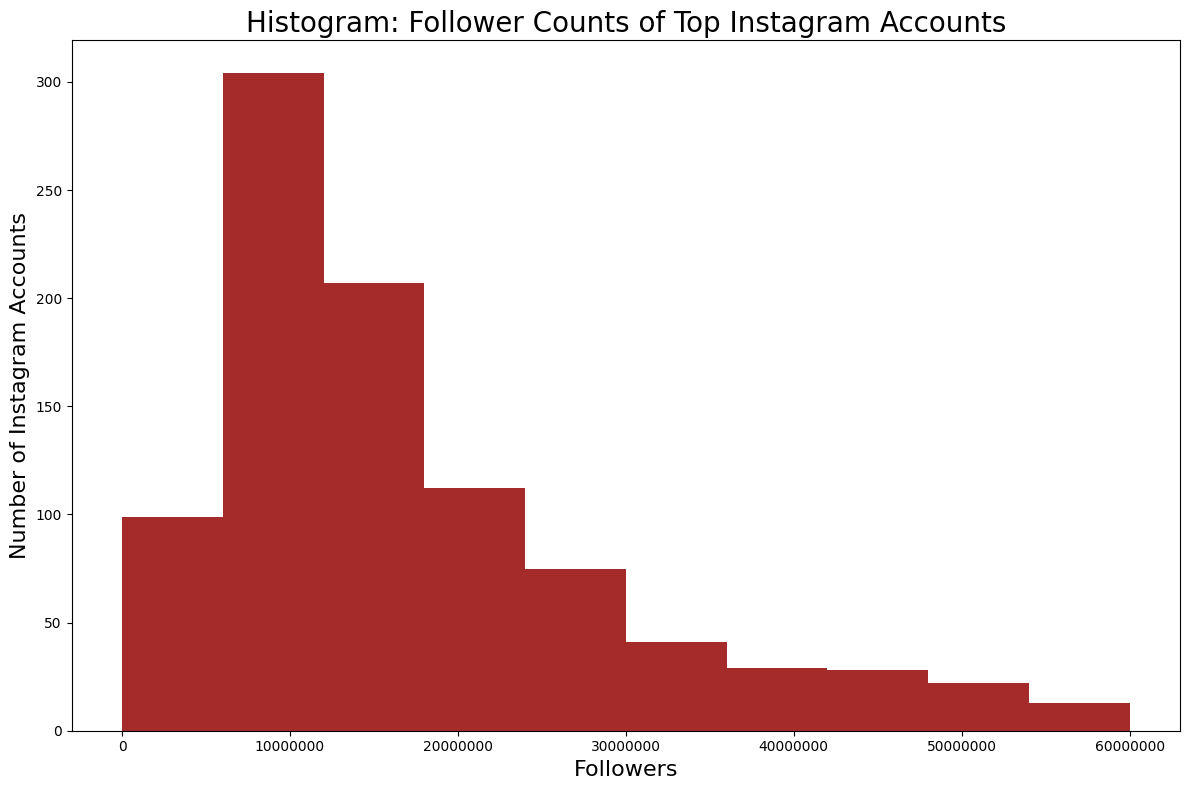

In [67]:
# plotting the number of accounts between 0 and 60 million followers

plt.figure(figsize=(12,8))
plt.hist(df.Followers, color='brown', range=(0,60000000))
plt.xlabel('Followers', fontsize = 16)
plt.ylabel('Number of Instagram Accounts', fontsize = 16)
plt.title('Histogram: Follower Counts of Top Instagram Accounts', fontsize = 20)
plt.tight_layout()
# remove scientific notation
plt.ticklabel_format(style='plain')